In [ ]:
#Import all the libraries

import pandas as pd
import numpy as np
import pywt
from sklearn.model_selection import train_test_split
import scipy.signal
from keras.models import Sequential
from keras.layers import LSTM, Dense, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import ConvLSTM1D, Flatten, Dense
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt


In [ ]:
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [ ]:
data = dataframe.drop(140, axis=1)
ecg_data = pd.Series([item for sublist in data.values for item in sublist])
ecg_data = ecg_data[:10000]

In [ ]:
def normalise(data):
  min_val = data.min()
  max_val = data.max()
  data = (data - min_val) / (max_val - min_val)
  return data

In [ ]:
ecg_data = normalise(ecg_data)

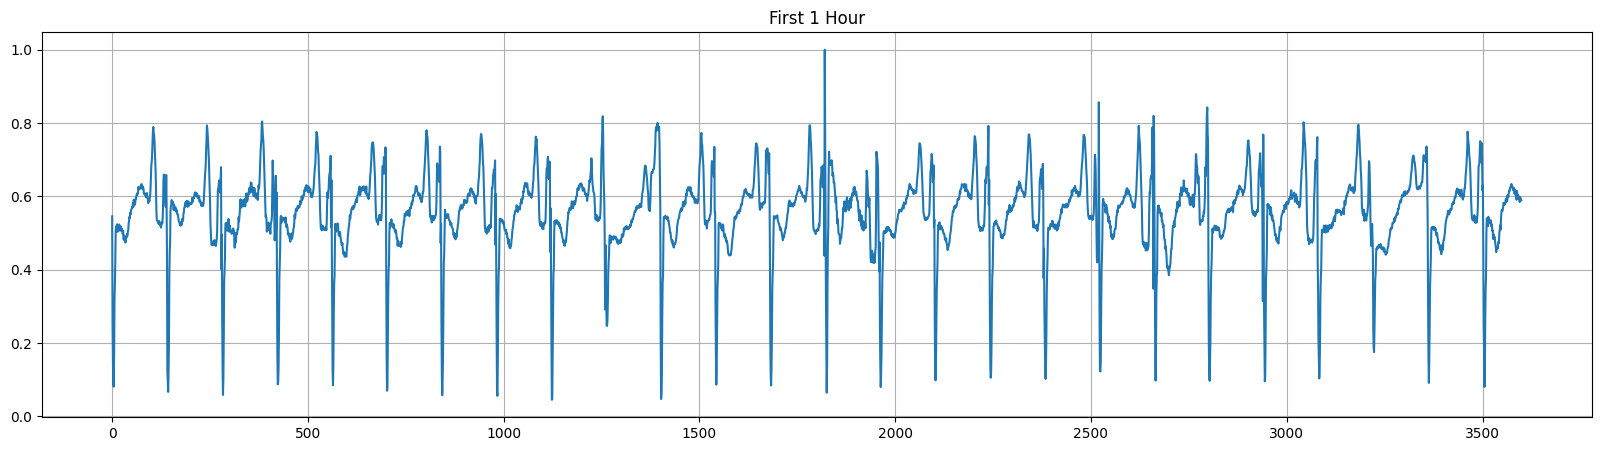

In [ ]:
first_ecg = ecg_data.iloc[:3600]

plt.figure(figsize=(20, 5))
plt.grid()
plt.plot(np.arange(3600), first_ecg)
plt.title("First 1 Hour")
plt.show()

In [ ]:
x = []
y = []

for i in range(60, len(ecg_data)):
  features = ecg_data.iloc[i-60:i]
  target = ecg_data.iloc[i]

  x.append(features.values.reshape(1, -1))
  y.append(target)

x = np.array(x)
y = np.array(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[2], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[2], 1))

In [ ]:
x_train = x_train.reshape((x_train.shape[0], 60, 1))
x_test = x_test.reshape((x_test.shape[0], 60, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, ConvLSTM1D, MaxPooling2D
from tensorflow.keras.layers import Conv1D,Dropout, LSTM, Dense

In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(60, 1)))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam",metrics=['mae', 'mse'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 58, 32)            128       
                                                                 
 lstm_8 (LSTM)               (None, 58, 64)            24832     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 37409 (146.13 KB)
Trainable params: 37409 (146.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=15,
    validation_data=(x_test, y_test)
)

Epoch 1/15
249/249 [==============================] - 21s 70ms/step - loss: 0.0145 - mae: 0.0699 - mse: 0.0145 - val_loss: 0.0060 - val_mae: 0.0472 - val_mse: 0.0060
Epoch 2/15
249/249 [==============================] - 18s 72ms/step - loss: 0.0031 - mae: 0.0326 - mse: 0.0031 - val_loss: 0.0019 - val_mae: 0.0262 - val_mse: 0.0019
Epoch 3/15
249/249 [==============================] - 18s 73ms/step - loss: 0.0015 - mae: 0.0224 - mse: 0.0015 - val_loss: 0.0017 - val_mae: 0.0227 - val_mse: 0.0017
Epoch 4/15
249/249 [==============================] - 16s 65ms/step - loss: 0.0012 - mae: 0.0196 - mse: 0.0012 - val_loss: 0.0015 - val_mae: 0.0158 - val_mse: 0.0015
Epoch 5/15
249/249 [==============================] - 17s 69ms/step - loss: 0.0012 - mae: 0.0196 - mse: 0.0012 - val_loss: 0.0015 - val_mae: 0.0173 - val_mse: 0.0015
Epoch 6/15
249/249 [==============================] - 18s 72ms/step - loss: 0.0011 - mae: 0.0185 - mse: 0.0011 - val_loss: 0.0015 - val_mae: 0.0160 - val_mse: 0.0015
Epoc

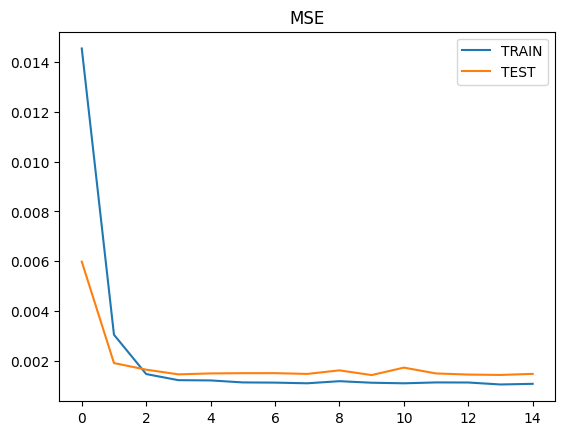

In [ ]:
plt.plot(history.history["mse"])
plt.plot(history.history["val_mse"])
plt.title("MSE")
plt.legend(["TRAIN" , "TEST"])
plt.show()

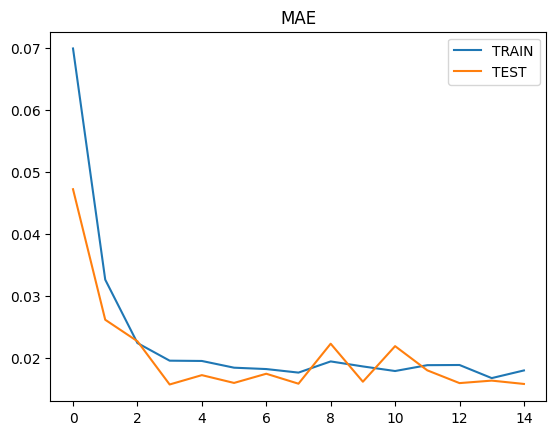

In [ ]:
plt.plot(history.history["mae"])
plt.plot(history.history["val_mae"])
plt.title("MAE")
plt.legend(["TRAIN" , "TEST"])
plt.show()

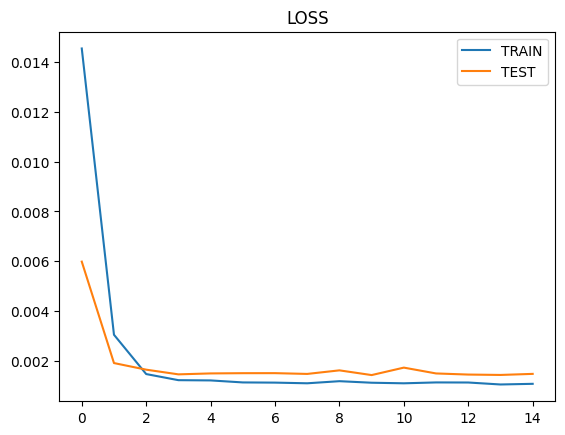

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("LOSS")
plt.legend(["TRAIN" , "TEST"])
plt.show()

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
  epsilon = 1e-7
  return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon)) * 100)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score
from math import log

y_pred = model.predict(x_test)

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("MSE :", mse)
print("MAE :" ,mae)
print("RMSE :" ,rmse)
print("R2_score :",r2)
print("MAPE :" ,mape)

63/63 [==============================] - 2s 17ms/step
MSE : 0.0014877802198369277
MAE : 0.015856980304695328
RMSE : 0.038571754171115004
R2_score : 0.874410169379373
MAE : 28.13696496028551


In [ ]:
model.save("conv+lstm.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/conv_lstm.h5')

In [ ]:
last_data = ecg_data.tail(60)
last_data = last_data.to_numpy()

In [ ]:
result = []
prediction_steps = 60
for i in range(prediction_steps):
  prediction = model.predict(last_data.reshape(-1, 60, 1))[0][0]
  result.append(prediction)
  last_data = np.append(last_data[1:], prediction)

1/1 [==============================] - 0s 26ms/step


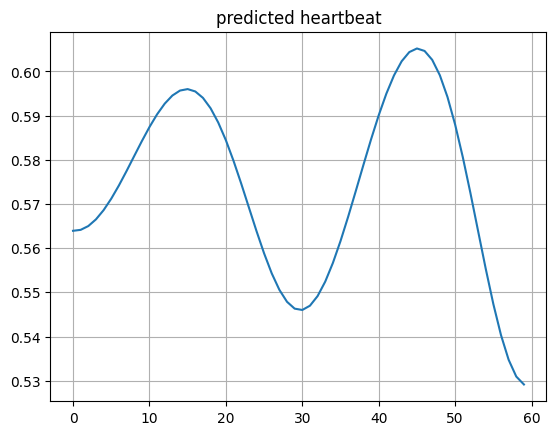

In [ ]:
plt.grid()
plt.plot(np.arange(60), result)
plt.title("predicted heartbeat")
plt.show()

In [ ]:
last_actual_data = ecg_data.tail(60)
all_values = last_actual_data.tolist()

In [ ]:
all_values.extend(result)

In [ ]:
actual_values = all_values[:60]
predicted_values = all_values[60:]
len(actual_values)

60

In [ ]:
time_axis = np.arange(len(all_values))
time_axis = list(time_axis)

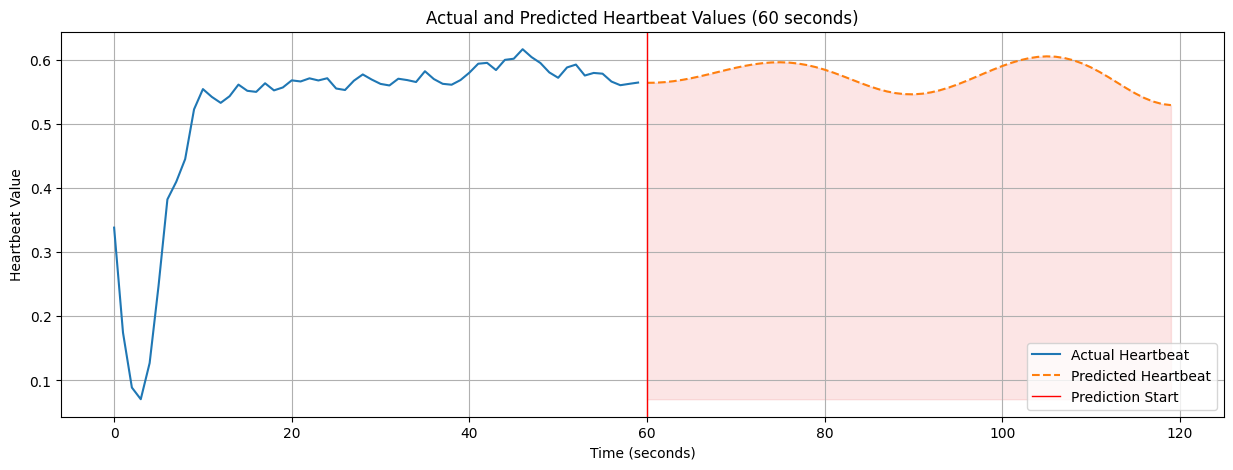

In [ ]:
plt.figure(figsize=(15, 5))

plt.plot(time_axis[:60], actual_values, label='Actual Heartbeat')
plt.plot(time_axis[60:], predicted_values, label='Predicted Heartbeat', linestyle='--')
plt.axvline(x=60, color='r', linestyle='-', linewidth=1, label='Prediction Start')

plt.xlabel('Time (seconds)')
plt.ylabel('Heartbeat Value')
plt.title('Actual and Predicted Heartbeat Values (60 seconds)')
plt.legend()
plt.grid(True)

plt.fill_between(time_axis[60:], predicted_values, np.min(all_values), alpha=0.2, color='lightcoral')


plt.show()

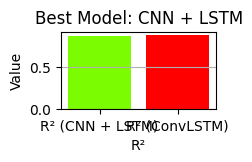

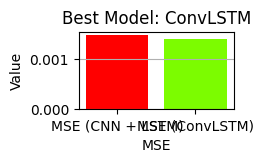

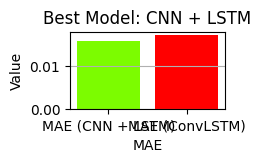

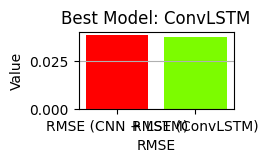

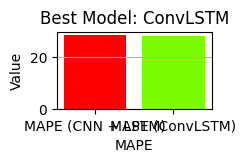

In [ ]:
import matplotlib.pyplot as plt

def compare_model_metrics(model1_metrics, model2_metrics, metric_names):

  figures = {}
  for metric in metric_names:
    value1 = model1_metrics.get(metric, None)
    value2 = model2_metrics.get(metric, None)
    color1 = 'red' if value1 > value2 else 'lawngreen'
    color2 = 'lawngreen' if value1 > value2 else 'red'
    if value1 < value2:
      text = "Best Model: CNN + LSTM"
    else:
      text = "Best Model: ConvLSTM"
    plt.figure(figsize=(2, 1))
    plt.bar([metric + ' (CNN + LSTM)', metric + ' (ConvLSTM)'], [value1, value2], color=[color1, color2])
    plt.xlabel(metric)
    plt.ylabel("Value")
    plt.title(text)
    plt.grid(axis='y')
    figures[metric] = plt.gcf()
  return figures


model1_metrics = {"R²": 0.87441, "MSE": 0.00148, "MAE": 0.0158, "RMSE": 0.0385, "MAPE": 28.136}
model2_metrics = {"R²": 0.88180, "MSE": 0.00140, "MAE": 0.01709, "RMSE": 0.0374, "MAPE": 27.9110}
metric_names = ["R²", "MSE", "MAE", "RMSE", "MAPE"]

figures = compare_model_metrics(model1_metrics, model2_metrics, metric_names)
plt.show()
